Đề tài:

Hướng 1: Áp dụng những thuật toán giới thiệu trong bài giảng, so sánh đánh giá sự hiệu quả của các thuật toán đó và đưa ra những thuật toán cải tiến mới tốt hơn cho chấm điểm tín dụng và áp dụng cho một trong các tập dữ liệu chấm điểm tín dụng sau:

Tập dữ liệu Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit


In [57]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd "/content/drive/My Drive/ML"
# !ls



In [58]:
!python -m pip install --upgrade pip
!pip install joblib
!pip install scikit-learn-intelex



In [59]:
import warnings

warnings.filterwarnings('ignore')


In [60]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [61]:
# Patching
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np


In [63]:
gitPath = "https://github.com/zhugez/AIMachineLearning/raw/main/data/"
trainPath = f"{gitPath}cs-training.csv"
testPath = f"{gitPath}cs-test.csv"
submission= f"{gitPath}sampleEntry.csv"
dataDescriptorPath = f"{gitPath}Data Dictionary.xls".replace(" ", "%20")


In [64]:
# trainDF = pd.read_csv('./data/cs-training.csv')
# testDF = pd.read_csv('./data/cs-test.csv')
# submission = pd.read_csv('./data/sampleEntry.csv')
# dataDescriptor = pd.read_excel('./data/Data Dictionary.xls').dropna()

trainDF = pd.read_csv(trainPath)
testDF = pd.read_csv(testPath)
submission = pd.read_csv(submission)
dataDescriptor = pd.read_excel(dataDescriptorPath)

# Phân tích data

In [65]:
trainDF.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [66]:
testDF.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [67]:
print("Mô tả ý nghĩa dữ liệu")
dataDescriptor


Mô tả ý nghĩa dữ liệu


,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


## Loại bỏ cột không cần thiết


In [68]:

trainDF = trainDF.drop(['Unnamed: 0'], axis=1)
testDF = testDF.drop(['Unnamed: 0'], axis=1)

print(trainDF.columns)
print(testDF.columns)


Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')
Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [69]:
trainDF.describe()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


## Kiểm tra các giá trị bị thiếu


In [70]:
trainDF.info()

# Thống kê để tìm xem các cột nào có giá trị null
trainDF.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

MonthlyIncome                           29731
NumberOfDependents                       3924
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
dtype: int64

In [71]:
testDF.info()
testDF.isnull().sum().sort_values(ascending=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

SeriousDlqin2yrs                        101503
MonthlyIncome                            20103
NumberOfDependents                        2626
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
dtype: int64

Ta có thể thấy thiếu một giá trị trong cột "MonthlyIncome" và "NumberOfDependents", Điều này xảy ra trong cả dữ liệu train và test.


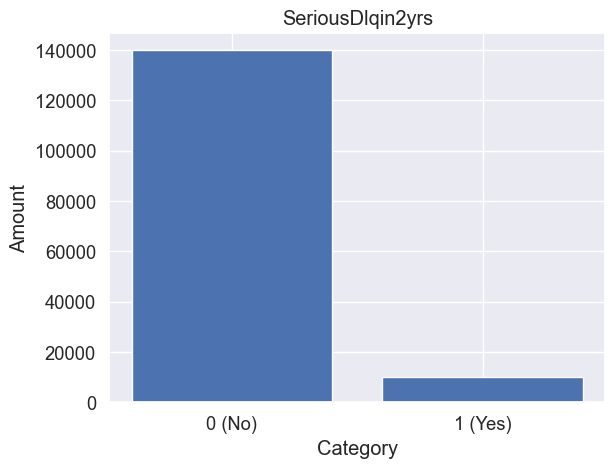

In [72]:
value_counts = trainDF['SeriousDlqin2yrs'].value_counts()
plt.bar(value_counts.index, value_counts.values)
plt.xticks(value_counts.index, labels=['0 (No)', '1 (Yes)'])
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('SeriousDlqin2yrs')
plt.show()


Ta có thể thấy ở đây xuất hiện sự không cân bằng và sai lệch, để cân bằng dữ liệu, ta cần đảm bảo rằng tỷ lệ giữa các lớp dữ liệu ít nhất là 5:5 hoặc 6:4. Một phương pháp khắc phục thông qua Oversampling là sử dụng kỹ thuật SMOTE. (Sẽ thực hiện ở phần sau)


In [73]:
trainDF.corr()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
SeriousDlqin2yrs,1.000000,-0.001802,-0.115386,0.125587,-0.007602,-0.019746,-0.029669,0.117175,-0.007038,0.102261,0.046048
RevolvingUtilizationOfUnsecuredLines,-0.001802,1.000000,-0.005898,-0.001314,0.003961,0.007124,-0.011281,-0.001061,0.006235,-0.001048,0.001557
age,-0.115386,-0.005898,1.000000,-0.062995,0.024188,0.037717,0.147705,-0.061005,0.033150,-0.057159,-0.213303
NumberOfTime30-59DaysPastDueNotWorse,0.125587,-0.001314,-0.062995,1.000000,-0.006542,-0.010217,-0.055312,0.983603,-0.030565,0.987005,-0.002680
DebtRatio,-0.007602,0.003961,0.024188,-0.006542,1.000000,-0.028712,0.049565,-0.008320,0.120046,-0.007533,-0.040673
MonthlyIncome,-0.019746,0.007124,0.037717,-0.010217,-0.028712,1.000000,0.091455,-0.012743,0.124959,-0.011116,0.062647
NumberOfOpenCreditLinesAndLoans,-0.029669,-0.011281,0.147705,-0.055312,0.049565,0.091455,1.000000,-0.079984,0.433959,-0.071077,0.065322
NumberOfTimes90DaysLate,0.117175,-0.001061,-0.061005,0.983603,-0.008320,-0.012743,-0.079984,1.000000,-0.045205,0.992796,-0.010176
NumberRealEstateLoansOrLines,-0.007038,0.006235,0.033150,-0.030565,0.120046,0.124959,0.433959,-0.045205,1.000000,-0.039722,0.124684
NumberOfTime60-89DaysPastDueNotWorse,0.102261,-0.001048,-0.057159,0.987005,-0.007533,-0.011116,-0.071077,0.992796,-0.039722,1.000000,-0.010922


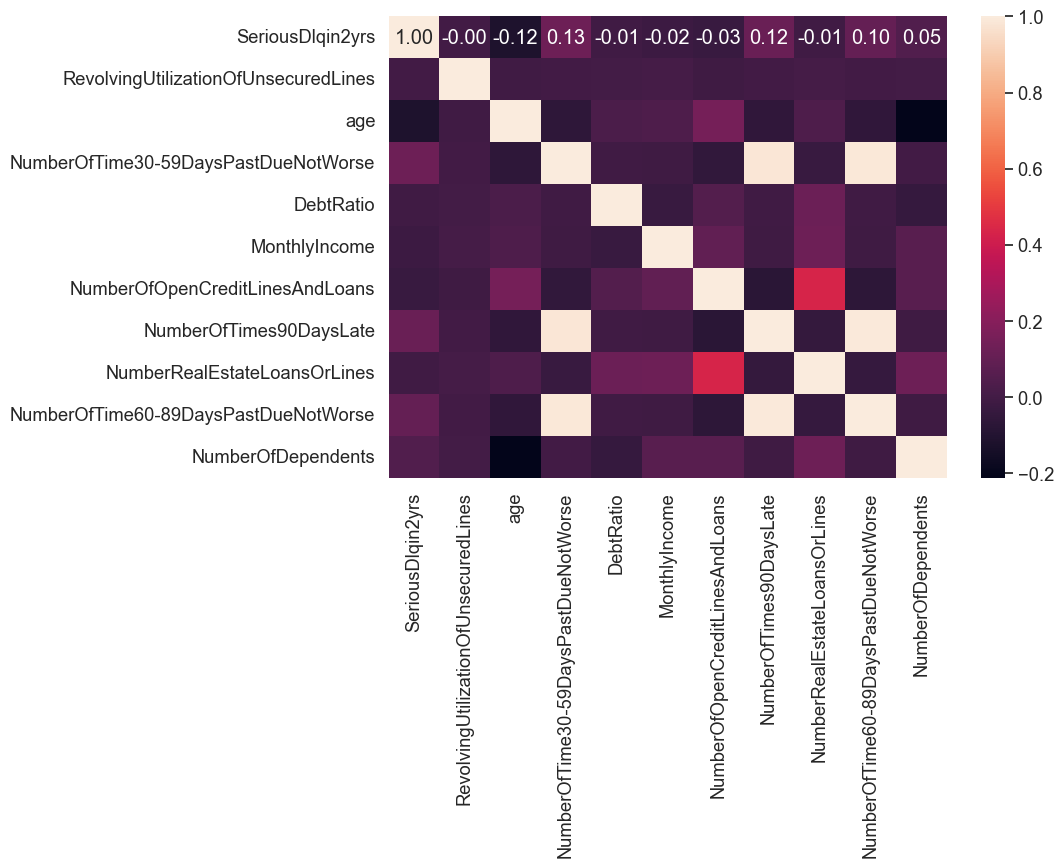

In [74]:
correlation_matrix = trainDF.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
sns.set(font_scale=1.2)
plt.show()


Từ hình trên có thể thấy 3 đặc trưng là `"NumberOfTme30-59DaysPastDueNotWorse",` `"NumberOfTimes90DaysLate"` và `"NumberOfTime60-89DaysPastDueNotWorse"` có độ tương quan cao là `0.99` Sau đó "Age" và "NumberOfDependents" có độ tương quan thấp nhất `-0.2`


Text(0, 0.5, 'Total')

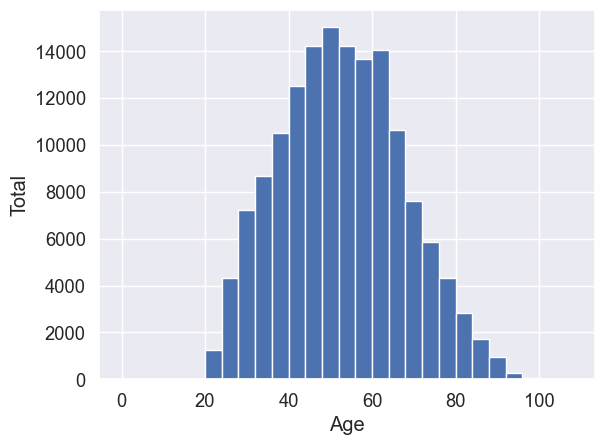

In [75]:
age_bins = [e for e in range(0, 110, 4)]

plt.hist(trainDF["age"], bins=age_bins)

plt.xlabel('Age')
plt.ylabel('Total')


Có thể thấy, phân bố theo độ tuổi thì phần lớn người đăng ký thẻ tín dụng nằm trong độ tuổi từ 45 – 65 tuổi.


## Check dữ liệu trùng lặp


In [76]:
print('Train Duplicated: ', trainDF.duplicated().sum())
print('Train size: ', trainDF.shape)


Train Duplicated:  609
Train size:  (150000, 11)


In [77]:
trainDF = trainDF.drop_duplicates()
print('Train dataset after dropping Duplicate: ', trainDF.shape)


Train dataset after dropping Duplicate:  (149391, 11)


<Axes: ylabel='age'>

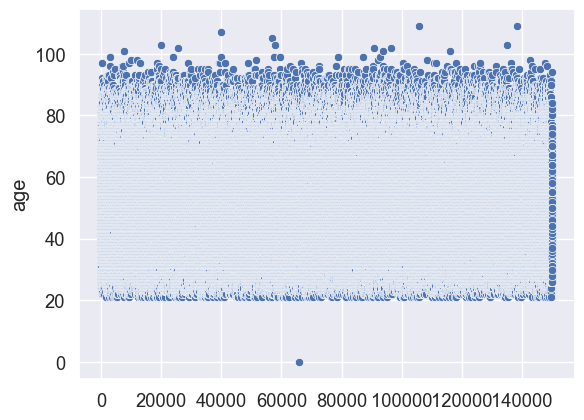

In [78]:
sns.scatterplot(trainDF.age)


Theo như biểu đồ ta có thể thấy ở cột `Age` có độ tuổi tối thiểu không có ý nghĩa gì để đăng ký tín dụng( 1 điểm là 0). Ta sẽ xoá dữ liệu này vì sẽ vô nghĩa nếu một người 0 tuổi có thể vay vốn.


<Axes: ylabel='age'>

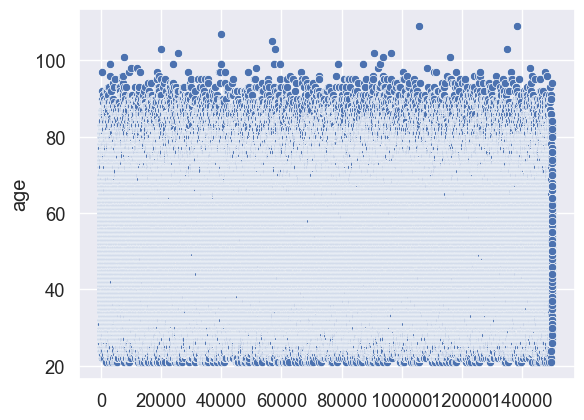

In [79]:
trainDF.drop(trainDF[trainDF.age == 0].index, inplace=True)
sns.scatterplot(trainDF.age)


In [80]:
trainDF["age"].describe()


count    149390.000000
mean         52.306587
std          14.725390
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

Có thể thấy, giới hạn độ tuổi tối thiểu sau khi bỏ số 0 trên danh nghĩa số tuổi nhỏ nhất là `21 tuổi` là hợp lý. Nhưng con số tối đa là `109 năm`, quá xa so với mức `75%`.
Ta viết hàm loại bỏ các giá trị ngoại lai (Outliers) bằng cách tính độ lệch chuẩn, sau đó tính giới hạn trên và giới hạn dưới dựa trên độ lệch chuẩn, sau đó thay thế các giá trị ngoại lai dựa trên mức trung bình, nếu giá trị cao hơn giới hạn trên hoặc giới hạn dưới thì dữ liệu sẽ được thay thế.


In [81]:
def removeOutliers(df, attribute_name, max_scale_from_std):
    std = df[attribute_name].std()

    upper_bound = df[attribute_name].mean() + max_scale_from_std * std
    lower_bound = df[attribute_name].mean() - max_scale_from_std * std

    df.loc[df[attribute_name] > upper_bound,
           attribute_name] = df[attribute_name].mean()
    df.loc[df[attribute_name] < lower_bound,
           attribute_name] = df[attribute_name].mean()

    return df


Với:

- df: Dataframe chứa dữ liệu.
- attribute_name: Tên của cột chứa dữ liệu cần loại bỏ.
- max_scale_from_std: Giá trị đại diện cho số lần độ lệch chuẩn (standard deviation) tối đa để xác định giới hạn trên và dưới cho outliers.


<Axes: ylabel='NumberOfTimes90DaysLate'>

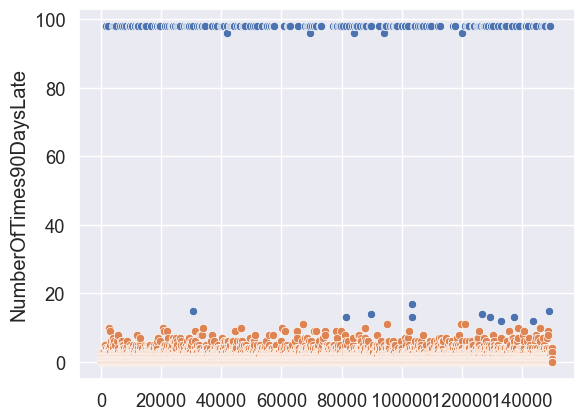

In [82]:
sns.scatterplot(trainDF.NumberOfTimes90DaysLate)
trainDF = removeOutliers(trainDF, "NumberOfTimes90DaysLate", 3)
sns.scatterplot(trainDF.NumberOfTimes90DaysLate)


<Axes: ylabel='NumberOfTime30-59DaysPastDueNotWorse'>

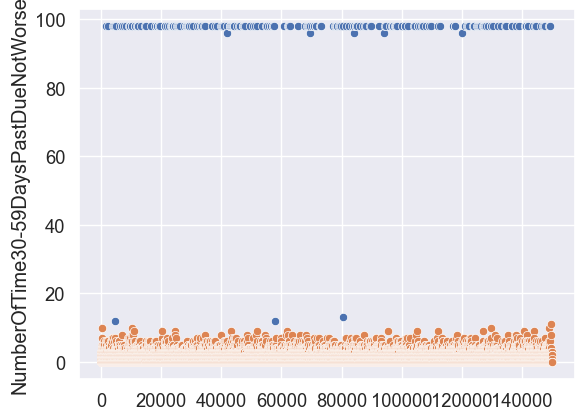

In [83]:
sns.scatterplot(trainDF["NumberOfTime30-59DaysPastDueNotWorse"])
trainDF = removeOutliers(trainDF, "NumberOfTime30-59DaysPastDueNotWorse", 3)
sns.scatterplot(trainDF["NumberOfTime30-59DaysPastDueNotWorse"])


<Axes: ylabel='NumberOfTime60-89DaysPastDueNotWorse'>

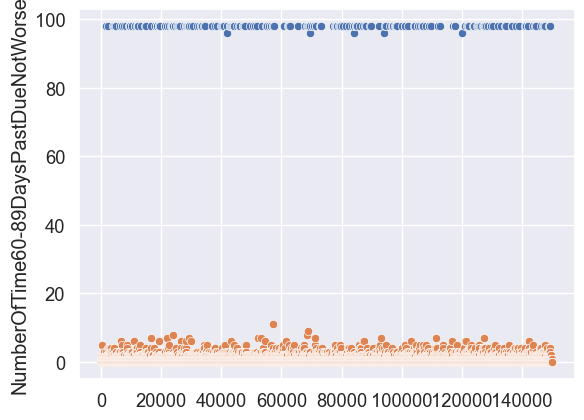

In [84]:
sns.scatterplot(trainDF["NumberOfTime60-89DaysPastDueNotWorse"])
trainDF = removeOutliers(trainDF, "NumberOfTime60-89DaysPastDueNotWorse", 3)
sns.scatterplot(trainDF["NumberOfTime60-89DaysPastDueNotWorse"])


Ta có thể thấy rằng các chấm màu xanh lam là dữ liệu trước khi loại bỏ ngoại lệ và các chấm màu cam là dữ liệu sau khi loại bỏ ngoại lệ.
Có nhiều cách để điền vào các giá trị còn thiếu, chẳng hạn như xóa, thay thế bằng 0 và các cách khác, nhưng ở đây ta sử dụng giá trị mean, median và mode.


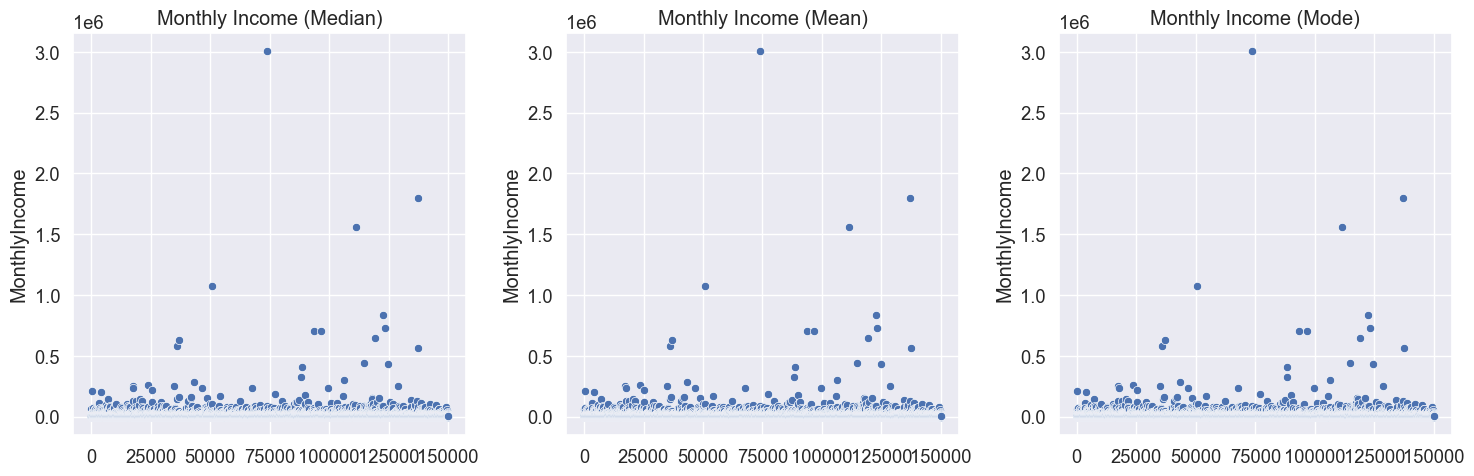

In [85]:
monthly_income_check = trainDF['MonthlyIncome']
monthly_income_median = monthly_income_check.fillna(
    monthly_income_check.median())
monthly_income_mean = monthly_income_check.fillna(monthly_income_check.mean())
monthly_income_mode = monthly_income_check.fillna(monthly_income_check.mode())

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(data=monthly_income_median)
plt.title('Monthly Income (Median)')

plt.subplot(132)
sns.scatterplot(data=monthly_income_mean)
plt.title('Monthly Income (Mean)')

plt.subplot(133)
sns.scatterplot(data=monthly_income_mode)
plt.title('Monthly Income (Mode)')

plt.tight_layout()


In [86]:
trainDF.MonthlyIncome.fillna(trainDF.MonthlyIncome.mean(), inplace=True)
testDF.MonthlyIncome.fillna(testDF.MonthlyIncome.mean(), inplace=True)


Dựa trên dữ liệu trên, khi có giá trị lương bị thiếu, ta có thể sử dụng giá trị trung bình để điền vào vì trung bình là một cách hợp lý để xác định giá trị lương bị thiếu. Lý do là lương hàng tháng dựa trên một phạm vi, không phải là một thể loại, nên việc sử dụng giá trị trung bình giúp duy trì sự phân bổ dữ liệu tương tự.


In [87]:
trainDF["MonthlyIncome"].info()


<class 'pandas.core.series.Series'>
Index: 149390 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype  
--------------   -----  
149390 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


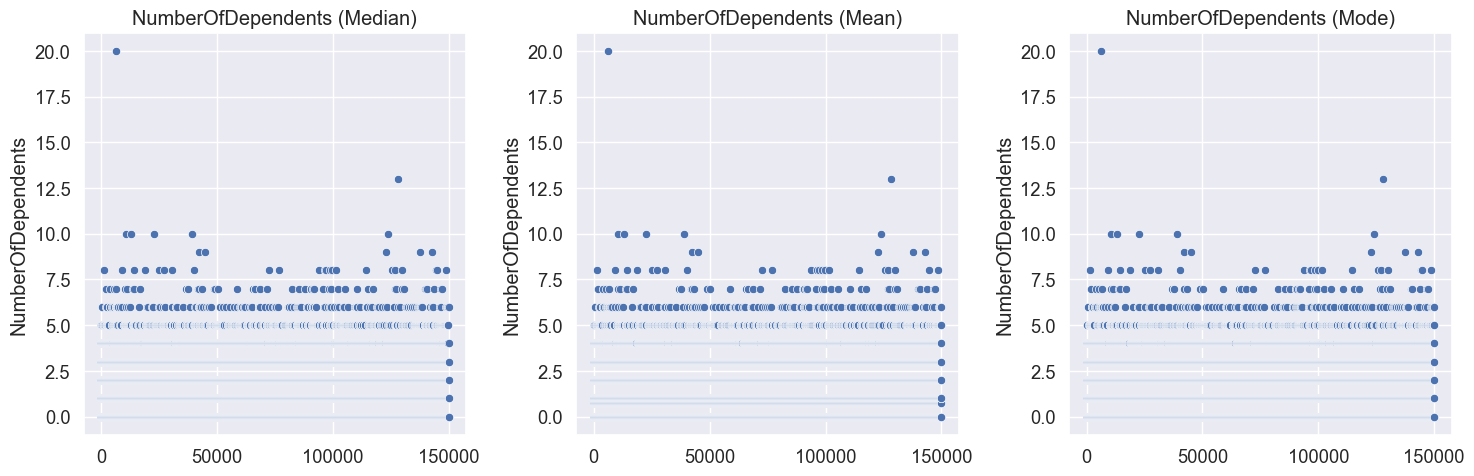

In [88]:
# So sánh dữ liệu sau khi nhập các giá trị bị thiếu với Giá trị trung bình, Trung vị và mode
NumberOfDependents_check = trainDF['NumberOfDependents']
NumberOfDependents_median = NumberOfDependents_check.fillna(
    NumberOfDependents_check.median())
NumberOfDependents_mean = NumberOfDependents_check.fillna(
    NumberOfDependents_check.mean())
NumberOfDependents_mode = NumberOfDependents_check.fillna(
    NumberOfDependents_check.mode())

plt.figure(figsize=(15, 5))

plt.subplot(131)
sns.scatterplot(data=NumberOfDependents_median)
plt.title('NumberOfDependents (Median)')

plt.subplot(132)
sns.scatterplot(data=NumberOfDependents_mean)
plt.title('NumberOfDependents (Mean)')

plt.subplot(133)
sns.scatterplot(data=NumberOfDependents_mode)
plt.title('NumberOfDependents (Mode)')

plt.tight_layout()


In [89]:
trainDF.NumberOfDependents = trainDF.NumberOfDependents.fillna(
    trainDF.NumberOfDependents.mode()[0])
testDF.NumberOfDependents = testDF.NumberOfDependents.fillna(
    testDF.NumberOfDependents.mode()[0])


Đối với dữ liệu NumberOfDependents ta sử dụng Mode vì dữ liệu NumberOfDependents là dữ liệu phân loại và rời rạc.


In [90]:
trainDF["MonthlyIncome"].info()
trainDF["NumberOfDependents"].describe()


<class 'pandas.core.series.Series'>
Index: 149390 entries, 0 to 149999
Series name: MonthlyIncome
Non-Null Count   Dtype  
--------------   -----  
149390 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


count    149390.000000
mean          0.740384
std           1.108271
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [91]:
testDF["NumberOfDependents"].describe()


count    101503.00000
mean          0.74915
std           1.12860
min           0.00000
25%           0.00000
50%           0.00000
75%           1.00000
max          43.00000
Name: NumberOfDependents, dtype: float64

Trong dữ liệu NumberOfDependents có sự khác biệt khá lớn ở mức 75% và tối đa. Và dữ liệu hơi không nhất quán về số lượng người phụ thuộc trong gia đình không bao gồm chính họ (vợ/chồng, con cái, v.v.), dữ liệu này không bình thường đối với ai đó có tới 20/43 người phụ thuộc. Bây giờ hãy để nó yên và chúng ta sẽ thấy nó trong kết quả mô hình.


![Debt-Ratio-Formula.jpg](attachment:Debt-Ratio-Formula.jpg)

Tỷ số nợ trên tổng tài sản


<Axes: ylabel='DebtRatio'>

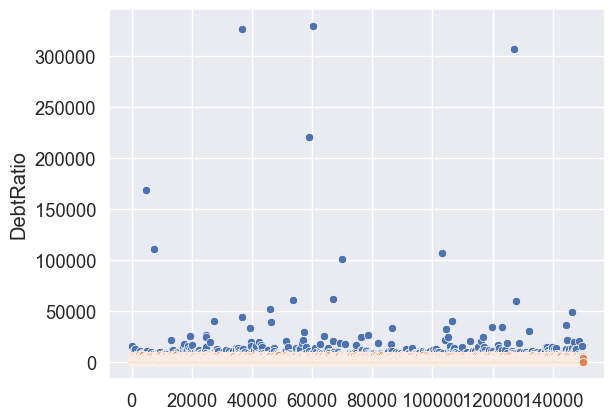

In [92]:
sns.scatterplot(trainDF["DebtRatio"])
trainDF = removeOutliers(trainDF, "DebtRatio", 3)
sns.scatterplot(trainDF["DebtRatio"])


In [93]:
trainDF['DebtRatio'].describe()


count    149390.000000
mean        300.938661
std         874.665361
min           0.000000
25%           0.177441
50%           0.368233
75%           0.875294
max        6467.000000
Name: DebtRatio, dtype: float64

<Axes: ylabel='DebtRatio'>

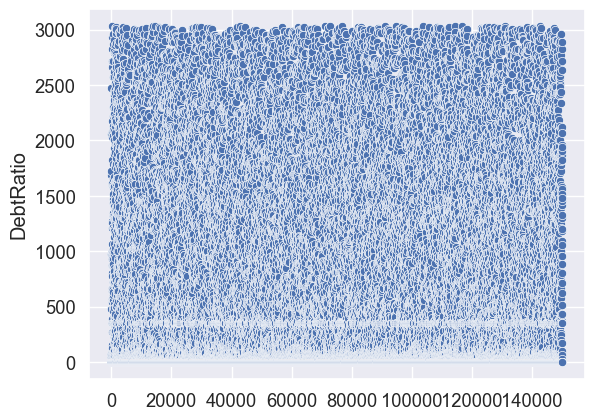

In [94]:
outlier = trainDF['DebtRatio'].quantile(0.97)
trainDF = trainDF[(trainDF.DebtRatio < outlier)]
sns.scatterplot(trainDF["DebtRatio"])

Trong dữ liệu trên có dữ liệu rất không rõ ràng vì làm sao một người có thể trả cho người phụ thuộc vượt quá giới hạn thu nhập của họ? sẽ không có khả năng trả nợ. Sau khi loại bỏ các ngoại lệ, dữ liệu vẫn không bình thường, bây giờ chúng ta hãy để dữ liệu yên.


In [95]:
x = trainDF.drop("SeriousDlqin2yrs", axis=1)
y = trainDF["SeriousDlqin2yrs"]


Tính năng "SeriousDlqin2yrs" không được sử dụng vì nó chỉ được sử dụng để thử nghiệm.


<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

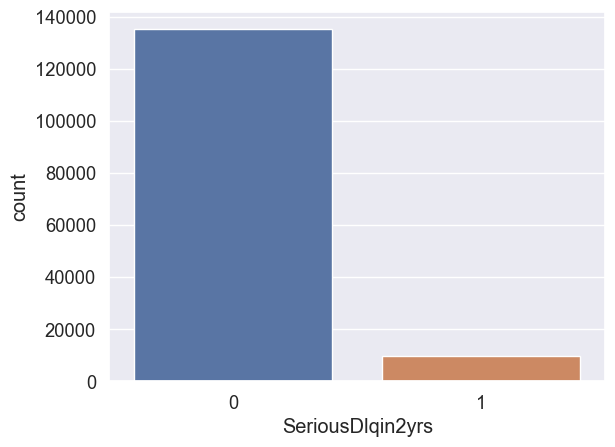

In [96]:
trainDF.SeriousDlqin2yrs.value_counts()
sns.countplot(x='SeriousDlqin2yrs', data=trainDF)


Có thể thấy rằng việc phân phối dữ liệu không được cân bằng như đã đề cập ở phần đầu. Ta sẽ cố gắng khắc phục điều này bằng phương pháp SMOTE.


<Axes: xlabel='target', ylabel='count'>

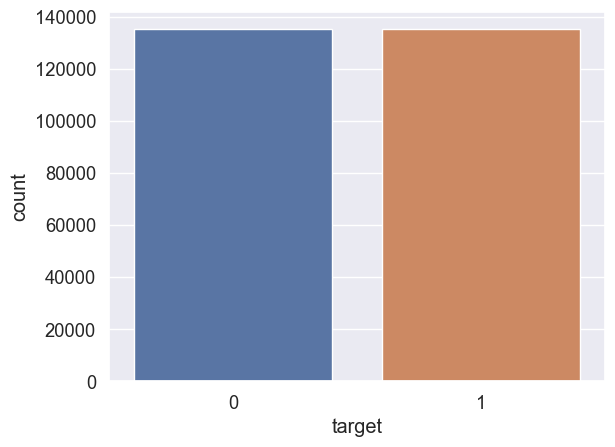

In [97]:
# Với auto tương đương với giá trị 'not majority'
oversample = SMOTE(sampling_strategy='auto', random_state=100)
xSmoted, ySmoted = oversample.fit_resample(x, y)

data = xSmoted.copy()
data['target'] = ySmoted

sns.countplot(x='target', data=data)


# Xây dựng model


In [98]:
def ROCDraw(y_test, prob, ax=None):
    from sklearn.metrics import auc, roc_curve
    import matplotlib.pyplot as plt

    fpr, tpr, _ = roc_curve(y_test, prob)
    auc_score = auc(fpr, tpr)

    if ax is None:
        plt.figure(1)
        ax = plt.gca()

    ax.plot([0, 1], [0, 1], linestyle='--')
    ax.plot(fpr, tpr, 'r', label=f'AUC= {auc_score:.4f}')
    ax.legend(loc='lower right')
    ax.plot(fpr, tpr, marker='.')
    ax.set_title("ROC Curve")
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')



In [99]:
x_train, x_test, y_train, y_test = train_test_split(xSmoted, ySmoted, test_size=0.2, random_state=100)
x_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
195203,1.146299,40,1.000000,2444.119803,6675.103887,8,4.000000,1,2.023961,0.000000
23239,0.178037,48,0.000000,0.486296,8500.000000,10,0.000000,2,0.000000,0.000000
266515,0.904796,41,0.371864,0.205239,5583.000000,3,0.814068,0,0.000000,2.628136
110816,0.154845,45,0.000000,0.191479,10162.000000,8,0.000000,1,0.000000,6.000000
174419,0.323394,31,0.374805,0.602523,1712.437792,14,1.311818,0,0.187403,0.562208
...,...,...,...,...,...,...,...,...,...,...
212912,0.187909,53,0.017306,1.077831,4000.000000,9,0.000000,2,0.000000,1.982694
65615,0.365298,58,1.000000,0.542410,6000.000000,8,0.000000,2,0.000000,1.000000
253799,0.462670,78,1.423325,540.036726,6675.103887,8,0.846650,0,0.000000,0.576675
210755,0.036588,70,0.145865,16.875077,8000.000000,17,0.000000,0,0.145865,0.000000


Huấn luyện và kiểm tra với tỷ lệ 80/20 và trạng thái ngẫu nhiên 100.


Model: LogisticRegression
              precision    recall  f1-score   support

           0       0.72      0.84      0.78     27104
           1       0.81      0.67      0.73     26956

    accuracy                           0.76     54060
   macro avg       0.76      0.76      0.75     54060
weighted avg       0.76      0.76      0.75     54060

Model: RandomForestClassifier
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     27104
           1       0.98      0.93      0.95     26956

    accuracy                           0.95     54060
   macro avg       0.95      0.95      0.95     54060
weighted avg       0.95      0.95      0.95     54060

Model: KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.93      0.77      0.85     27104
           1       0.81      0.94      0.87     26956

    accuracy                           0.86     54060
   macro avg       0.87      0.86      0.86 

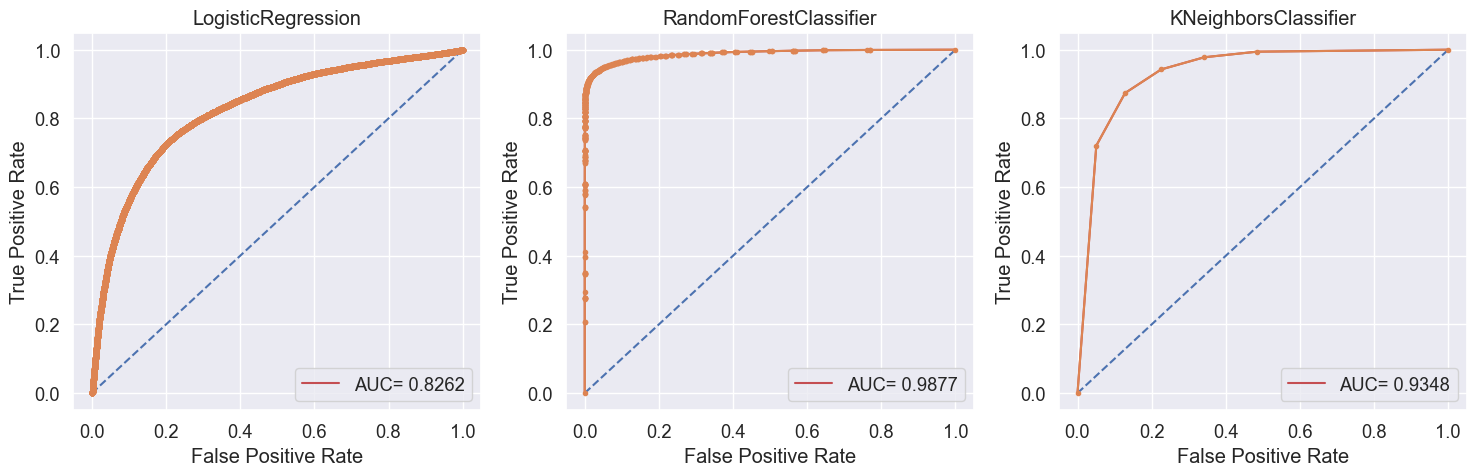

In [100]:

def fit_and_predict(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]
    ROCDraw(y_test, y_proba, ax=axs[i])
    return y_pred, y_proba
def print_classification_report(y_true, y_pred):
    report = classification_report(y_true, y_pred)
    print(report)
models = {'LogisticRegression': LogisticRegression(),'RandomForestClassifier': RandomForestClassifier(),'KNeighborsClassifier': KNeighborsClassifier()}

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, (model_name, model) in enumerate(models.items()):
    y_pred, y_proba = fit_and_predict(model, x_train, y_train, x_test)
    print(f"Model: {model_name}")
    print_classification_report(y_test, y_pred)
    axs[i].set_title(model_name)
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')

plt.tight_layout()
plt.show()




## Lưu ý:
### Với LinearRegression
Hàm predict_proba sẽ dự đoán xác suất của class $P(y_i = 1 | X_i)$ như sau: $$\hat{p}(X_i) = expit(X_i\omega+\omega_0) = \frac{1}{1+exp(-X_i\omega-\omega_0)}$$
Để giải quyết vấn đề tối ưu hàm cost được tính bằng công thức sau: $$\underset{min}{\omega}C\sum_{n=1}^n (-y_i log(\hat{p}(X_i))-(1-y_i)log(1-\hat{p}(X_i)))+r(\omega)$$
Thư viện cung cấp 4 lựa chọn cho $r(\omega)$ thông qua đối số penalty:

![image.png](attachment:image.png)



# Đánh giá
Báo cáo dựa trên kết quả thu được từ các mô hình phân loại với dữ liệu huấn luyện và kiểm tra với tỷ lệ 80/20 và trạng thái ngẫu nhiên 100 như sau:

       -  Mô hình LogisticRegression:
              - Điểm AUC: 0.8547
              - Precision: Mô hình có độ chính xác là 0.73 cho lớp 0 và 0.84 cho lớp 1.
              - Recall: Mô hình có độ phục hồi là 0.87 cho lớp 0 và 0.69 cho lớp 1.
              - F1-score: F1-score là 0.80 cho lớp 0 và 0.75 cho lớp 1.
              - Accuracy: Độ chính xác tổng thể của mô hình là 0.78.

       -  Mô hình RandomForestClassifier:
              - Điểm AUC: 0.9882
              - Precision: Mô hình có độ chính xác là 0.94 cho lớp 0 và 0.98 cho lớp 1.
              - Recall: Mô hình có độ phục hồi là 0.98 cho lớp 0 và 0.93 cho lớp 1.
              - F1-score: F1-score là 0.96 cho lớp 0 và 0.95 cho lớp 1.
              - Accuracy: Độ chính xác tổng thể của mô hình là 0.95.
              
       -  Mô hình KNeighborsClassifier:
              - Điểm AUC: 0.9335
              -  Precision: Mô hình có độ chính xác là 0.86 cho lớp 0 và 0.88 cho lớp 1.
              - Recall: Mô hình có độ phục hồi là 0.88 cho lớp 0 và 0.86 cho lớp 1.
              - F1-score: F1-score là 0.87 cho lớp 0 và 0.86 cho lớp 1.
              - Accuracy: Độ chính xác tổng thể của mô hình là 0.86.
              
Dựa trên các kết quả trên, có thể thấy mô hình RandomForestClassifier có hiệu suất tốt nhất với độ chính xác tổng thể là 0.95 và AUC Score là 0.9882. Mô hình LogisticRegression có hiệu suất thấp hơn với độ chính xác tổng thể là 0.78 và AUC Score là 0.8547. Mô hình KNeighborsClassifier có hiệu suất trung bình với độ chính xác tổng thể là 0.86 và AUC Score là 0.9335.

# Hyperparameter tuning


Ở đây em chọn mô hình LogisticRegression và KNeighborsClassifier để tối ưu bằng cách điều chỉnh các siêu tham số như C, max_iter, penalty đối với mô hình LogisticRegression và n_neighbors đối với KNeighborsClassifier. Dùng phương pháp GridSearchCV để tìm ra các giá trị của các siêu tham số cho phù hợp với mô hình.

GridSearchCV hoạt động bằng cách xác định một lưới các siêu tham số và sau đó hệ thống hóa việc đào tạo và đánh giá một mô hình học máy cho mỗi kết hợp siêu tham số. Quy trình đào tạo và đánh giá mô hình cho mỗi kết hợp được gọi là cross-validation. Bộ siêu tham số tốt nhất sau đó được chọn dựa trên chỉ số hiệu suất đã chỉ định.


Best parameters: {'C': 1000, 'max_iter': 1000, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       0.72      0.84      0.78     27104
           1       0.81      0.67      0.73     26956

    accuracy                           0.76     54060
   macro avg       0.76      0.75      0.75     54060
weighted avg       0.76      0.76      0.75     54060

Best parameters: {'n_neighbors': 3}
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     27104
           1       0.82      0.95      0.88     26956

    accuracy                           0.87     54060
   macro avg       0.88      0.87      0.87     54060
weighted avg       0.88      0.87      0.87     54060



KeyboardInterrupt: 

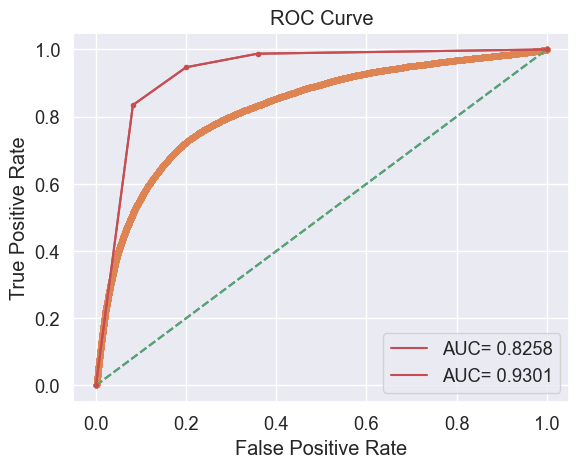

In [101]:
from sklearn.model_selection import GridSearchCV
import joblib

def train_and_evaluate(model, params, x_train, y_train, x_test, y_test):
    grid = GridSearchCV(model, params, n_jobs=-1, cv=5)
    grid.fit(x_train, y_train)
    best_params = grid.best_params_
    print(f"Best parameters: {best_params}")
    model.set_params(**best_params)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    ROCDraw(y_test, model.predict_proba(x_test)[:, 1])
    joblib.dump(model, f'{type(model).__name__}_model.pkl')

models_and_params = [
    (LogisticRegression(), {'C': [0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 300, 400, 500, 1000],'penalty': ['none', 'l2']}),
    (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]}),
    (RandomForestClassifier(), {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]})
]

for model, params in models_and_params:
    train_and_evaluate(model, params, x_train, y_train, x_test, y_test)


Sau khi thực hiện việc tối ưu bằng cách tinh chỉnh các tham số thì dựa vào biểu đồ trên có thể thấy độ chính xác và hiệu quả của mô hình đã được tăng lên.